# Linear Regression


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [8]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2 * x) + 0.8 * x + 0.3 * np.random.randn(100)
print(x)

[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

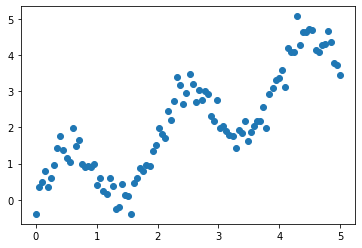

In [5]:
plt.scatter(x, y)

#### nonlinear

In [7]:
regr_lin = LinearRegression()

In [11]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [12]:
regr_lin.fit(X, y)

LinearRegression()

0.57624


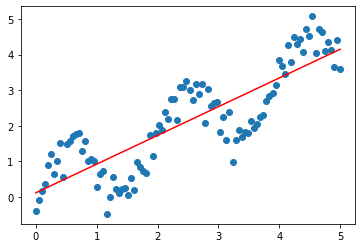

In [15]:
Y = regr_lin.predict(X)
plt.scatter(x, y)
plt.plot(x, Y, c = "r")
MSE = np.sum((Y - y) ** 2) / len(y)
print(f"{MSE:.5f}")

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [16]:
print(x.shape)

(100,)


In [35]:
X_poly = np.array([[k, k **2, k **3, k **4, k ** 5] for k in x])   # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [36]:
regr_poly = LinearRegression()

In [37]:
regr_poly.fit(X_poly, y)

LinearRegression()

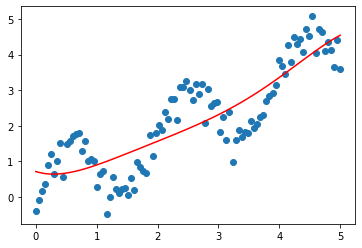

In [38]:
plt.scatter(x, y)
plt.plot(x, regr_poly.predict(X_poly), "r")

In [39]:
print(f"Cofficients: {regr_poly.coef_}")
print(f"Interception: {regr_poly.intercept_:.5f}")

Cofficients: [-0.53894002  1.12980538 -0.50652019  0.10753963 -0.00820037]
Interception: 0.71907


In [40]:
W = regr_poly.coef_
b = regr_poly.intercept_
np.dot(X_poly, W.T) +b

array([0.71907146, 0.69466957, 0.67564961, 0.66164483, 0.65230465,
       0.6472943 , 0.64629453, 0.64900123, 0.65512517, 0.66439164,
       0.67654014, 0.69132404, 0.70851029, 0.72787906, 0.74922344,
       0.7723491 , 0.79707398, 0.82322796, 0.85065255, 0.87920054,
       0.90873571, 0.93913247, 0.97027557, 1.00205974, 1.03438942,
       1.06717839, 1.10034946, 1.13383414, 1.16757234, 1.20151204,
       1.23560893, 1.26982613, 1.30413387, 1.33850912, 1.37293531,
       1.40740198, 1.44190448, 1.47644364, 1.51102542, 1.54566063,
       1.58036457, 1.61515674, 1.65006047, 1.68510264, 1.72031336,
       1.7557256 , 1.7913749 , 1.82729904, 1.86353775, 1.90013231,
       1.93712528, 1.97456021, 2.01248121, 2.05093274, 2.08995922,
       2.12960473, 2.16991266, 2.21092545, 2.25268418, 2.29522831,
       2.33859535, 2.38282051, 2.42793638, 2.47397264, 2.52095571,
       2.56890842, 2.6178497 , 2.66779427, 2.71875227, 2.77072899,
       2.82372453, 2.87773346, 2.93274449, 2.9887402 , 3.04569

In [42]:
MSE = np.sum((regr_poly.predict(X_poly) - y) ** 2) / len(y)
print(f"{MSE:.5f}")

0.53136


In [33]:
regr_poly.predict(X_poly)

array([0.71907146, 0.69466957, 0.67564961, 0.66164483, 0.65230465,
       0.6472943 , 0.64629453, 0.64900123, 0.65512517, 0.66439164,
       0.67654014, 0.69132404, 0.70851029, 0.72787906, 0.74922344,
       0.7723491 , 0.79707398, 0.82322796, 0.85065255, 0.87920054,
       0.90873571, 0.93913247, 0.97027557, 1.00205974, 1.03438942,
       1.06717839, 1.10034946, 1.13383414, 1.16757234, 1.20151204,
       1.23560893, 1.26982613, 1.30413387, 1.33850912, 1.37293531,
       1.40740198, 1.44190448, 1.47644364, 1.51102542, 1.54566063,
       1.58036457, 1.61515674, 1.65006047, 1.68510264, 1.72031336,
       1.7557256 , 1.7913749 , 1.82729904, 1.86353775, 1.90013231,
       1.93712528, 1.97456021, 2.01248121, 2.05093274, 2.08995922,
       2.12960473, 2.16991266, 2.21092545, 2.25268418, 2.29522831,
       2.33859535, 2.38282051, 2.42793638, 2.47397264, 2.52095571,
       2.56890842, 2.6178497 , 2.66779427, 2.71875227, 2.77072899,
       2.82372453, 2.87773346, 2.93274449, 2.9887402 , 3.04569

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [43]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center) ** 2 / (2 * sigma ** 2))
    return k

In [44]:
sigma = 0.3

In [45]:
X_rbf = np.array([[RBF(k, .5, sigma),
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])

In [47]:
regr_rbf = LinearRegression()

In [48]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

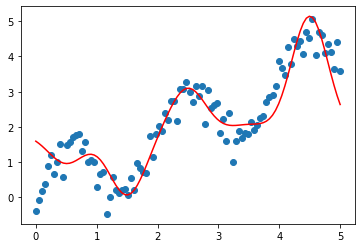

In [49]:
plt.scatter(x, y)
plt.plot(x, regr_rbf.predict(X_rbf), "r")

In [51]:
print(f"Coefficients: {regr_rbf.coef_}")
print(f"Interception: {regr_rbf.intercept_:.5f}")

Coefficients: [-0.83706266 -1.73875298  1.30241512  0.25249163  3.33806198]
Interception: 1.80432


In [25]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.72620466 -1.83462409  1.09615001 -0.01194894  3.09093005]
interception:  1.877906975572715


#### Comparison

In [52]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

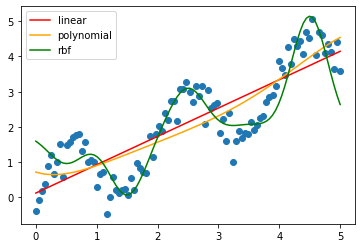

In [56]:
plt.scatter(x, y)

plt.plot(x, Y_lin, label = "linear", c = "r")
plt.plot(x, Y_poly, label = "polynomial", c = "orange")
plt.plot(x, Y_rbf, label = "rbf", c = "g")
plt.legend()

## 請計算模型的MSE

In [57]:
print(np.sum((regr_lin.predict(X) - y) ** 2) / len(y))

0.57624338384534


In [58]:
print(np.sum((regr_poly.predict(X_poly) - y) ** 2) / len(y))

0.5313606442222402


In [59]:
print(np.sum((regr_rbf.predict(X_rbf) - y) ** 2) / len(y))

0.3160168768029347
